### Import of Modules

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from pandas.plotting import scatter_matrix
import calendar

### Loading Dataset

In [2]:
df = pd.read_csv("C:/Users/HP/Documents/Volcanoe/Labeled Kilauea Volcanoe Data.csv")

### Dataset Information

In [3]:
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")
print("Dataset shape:", df.shape)

Number of Rows: 18169
Number of Columns: 17
Dataset shape: (18169, 17)


In [4]:
print("Column Names:")
print(df.columns.tolist())

Column Names:
['latitude', 'longitude', 'brightness', 'scan', 'track', 'eruption_date', 'acq_time', 'satellite', 'instrument', 'confidence', 'version', 'bright_t31', 'frp', 'daynight', 'type', 'year', 'label']


In [5]:
print("\nFirst 5 rows:")
print(df.head())


First 5 rows:
   latitude  longitude  brightness  scan  track eruption_date  acq_time  \
0   19.4156  -155.4116       308.7   1.0    1.0    2003-02-24       837   
1   19.4142  -155.4210       320.6   1.0    1.0    2003-02-24       837   
2   19.4245  -155.4130       315.9   1.0    1.0    2003-02-24       837   
3   19.4231  -155.4224       345.6   1.0    1.0    2003-02-24       837   
4   19.4218  -155.4319       348.9   1.0    1.0    2003-02-24       837   

  satellite instrument  confidence  version  bright_t31   frp daynight  type  \
0     Terra      MODIS          71      6.2       283.8  10.5        N     0   
1     Terra      MODIS         100      6.2       284.8  20.9        N     0   
2     Terra      MODIS          86      6.2       286.4  15.9        N     0   
3     Terra      MODIS         100      6.2       290.3  56.5        N     0   
4     Terra      MODIS         100      6.2       288.0  63.4        N     0   

   year  label  
0  2003      1  
1  2003      1  
2 

In [6]:
print("\nLast 5 rows:")
print(df.tail())


Last 5 rows:
       latitude  longitude  brightness  scan  track eruption_date  acq_time  \
18164   19.3935  -155.2204       314.0   2.2    1.4    2024-12-31      1940   
18165   19.4107  -155.2601       319.7   2.2    1.5    2024-12-31      1940   
18166   19.4129  -155.2808       389.8   2.3    1.5    2024-12-31      1940   
18167   19.4023  -155.3029       398.1   2.3    1.5    2024-12-31      1940   
18168   19.4001  -155.2823       500.0   2.3    1.5    2024-12-31      1940   

      satellite instrument  confidence  version  bright_t31     frp daynight  \
18164     Terra      MODIS          60    61.03       289.4    34.5        D   
18165     Terra      MODIS          45    61.03       297.9    47.4        D   
18166     Terra      MODIS         100    61.03       322.7   638.8        D   
18167     Terra      MODIS         100    61.03       304.7   779.9        D   
18168     Terra      MODIS         100    61.03       342.8  5239.8        D   

       type  year  label  
181

In [7]:
print("Statistics Description of Numeric Features")
print(df.describe())

Statistics Description of Numeric Features
           latitude     longitude    brightness          scan         track  \
count  18169.000000  18169.000000  18169.000000  18169.000000  18169.000000   
mean      19.407506   -155.283642    346.984567      1.831664      1.294865   
std        0.016158      0.022595     36.243387      0.920343      0.265237   
min       19.364300   -155.500000    300.000000      1.000000      1.000000   
25%       19.402200   -155.288200    319.700000      1.100000      1.100000   
50%       19.406000   -155.281600    337.800000      1.400000      1.200000   
75%       19.410000   -155.275100    366.900000      2.300000      1.500000   
max       19.599600   -155.220400    508.900000      4.800000      2.000000   

           acq_time    confidence       version    bright_t31           frp  \
count  18169.000000  18169.000000  18169.000000  18169.000000  18169.000000   
mean    1335.028730     86.053167     10.246582    294.509103    189.590330   
std     

In [8]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
latitude         0
longitude        0
brightness       0
scan             0
track            0
eruption_date    0
acq_time         0
satellite        0
instrument       0
confidence       0
version          0
bright_t31       0
frp              0
daynight         0
type             0
year             0
label            0
dtype: int64


In [9]:
print("\nNumber of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 0


In [10]:
print("\nData info:")
print(df.info())


Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18169 entries, 0 to 18168
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   latitude       18169 non-null  float64
 1   longitude      18169 non-null  float64
 2   brightness     18169 non-null  float64
 3   scan           18169 non-null  float64
 4   track          18169 non-null  float64
 5   eruption_date  18169 non-null  object 
 6   acq_time       18169 non-null  int64  
 7   satellite      18169 non-null  object 
 8   instrument     18169 non-null  object 
 9   confidence     18169 non-null  int64  
 10  version        18169 non-null  float64
 11  bright_t31     18169 non-null  float64
 12  frp            18169 non-null  float64
 13  daynight       18169 non-null  object 
 14  type           18169 non-null  int64  
 15  year           18169 non-null  int64  
 16  label          18169 non-null  int64  
dtypes: float64(8), int64(5), object(4)
mem

### Data Cleaning

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
if 'acq_date' in df.columns:
    df['acq_date'] = pd.to_datetime(df['acq_date'], errors='coerce')

In [13]:
essential_cols = ['latitude', 'longitude', 'frp', 'year', 'label']
df.dropna(subset=essential_cols, inplace=True)

# Exploratory Data Analysis


Label Distribution:
 label
1    17757
0      412
Name: count, dtype: int64




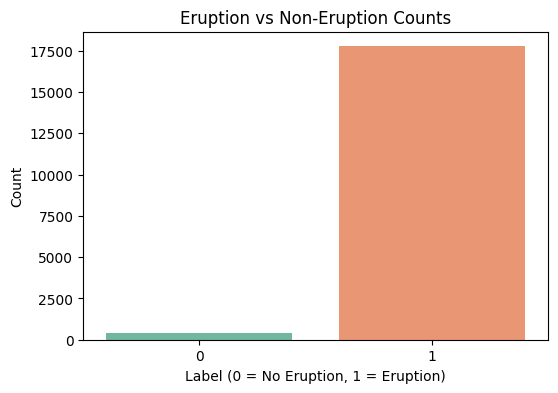

In [14]:
label_counts = df['label'].value_counts()


print("\nLabel Distribution:\n", label_counts)

print("\n")
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df, palette='Set2')
plt.title("Eruption vs Non-Eruption Counts")
plt.xlabel("Label (0 = No Eruption, 1 = Eruption)")
plt.ylabel("Count")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_9136\2171276010.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x="year", y="frp", ci=None, marker="o")
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


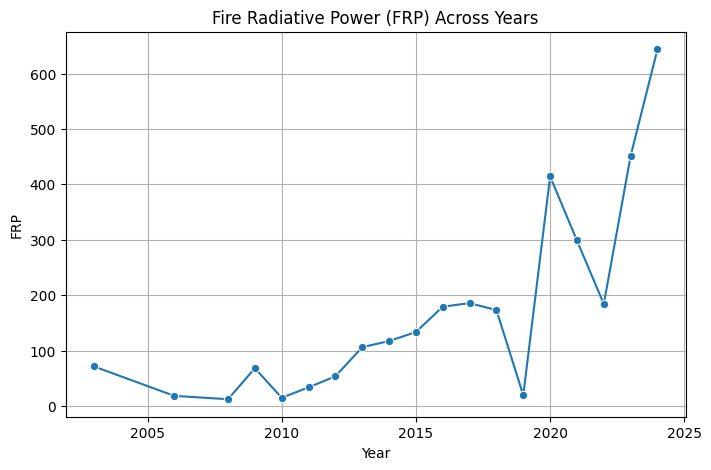

In [15]:
# FRP Over years
plt.figure(figsize=(8,5))
sns.lineplot(data=df, x="year", y="frp", ci=None, marker="o")
plt.title("Fire Radiative Power (FRP) Across Years")
plt.xlabel("Year")
plt.ylabel("FRP")
plt.grid(True)
plt.show()

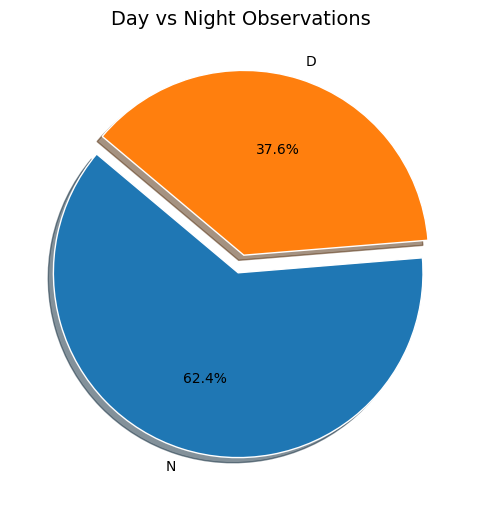

In [16]:
plt.figure(figsize=(6,6))
colors = ["#1f77b4", "#ff7f0e"]
explode = (0.05, 0.05)

df["daynight"].value_counts().plot.pie(
    autopct="%1.1f%%",
    startangle=140,
    colors=colors,
    explode=explode,
    shadow=True,
    wedgeprops={"edgecolor":"white", "linewidth":1}
)

plt.title("Day vs Night Observations", fontsize=14)
plt.ylabel("")
plt.show()


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


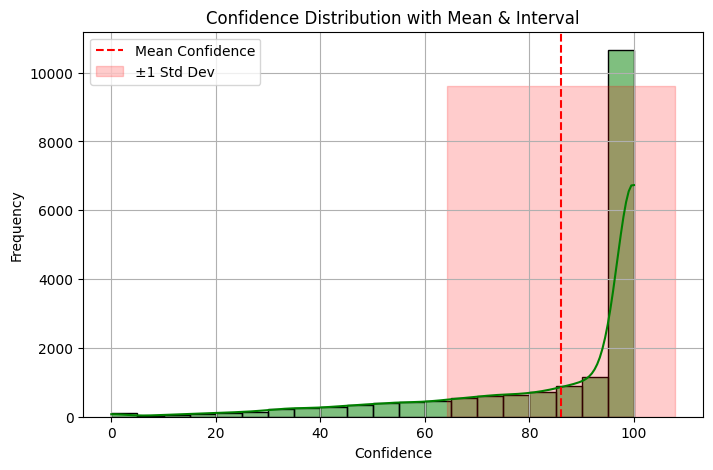

In [17]:
plt.figure(figsize=(8,5))
sns.histplot(df["confidence"], bins=20, kde=True, color="green")
plt.axvline(df["confidence"].mean(), color="red", linestyle="--", label="Mean Confidence")
plt.fill_betweenx(
    y=[0, df["confidence"].value_counts().max()],
    x1=df["confidence"].mean() - df["confidence"].std(),
    x2=df["confidence"].mean() + df["confidence"].std(),
    color="red", alpha=0.2, label="±1 Std Dev"
)
plt.title("Confidence Distribution with Mean & Interval")
plt.xlabel("Confidence")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

### Univariate Analysis of Numerical Features

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


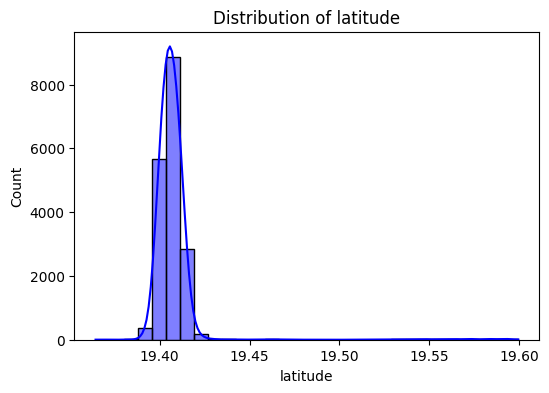

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


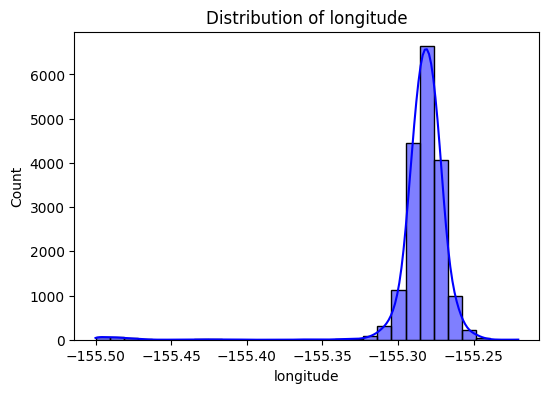

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


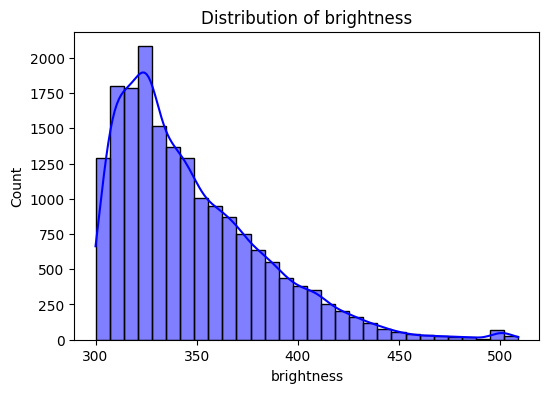

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


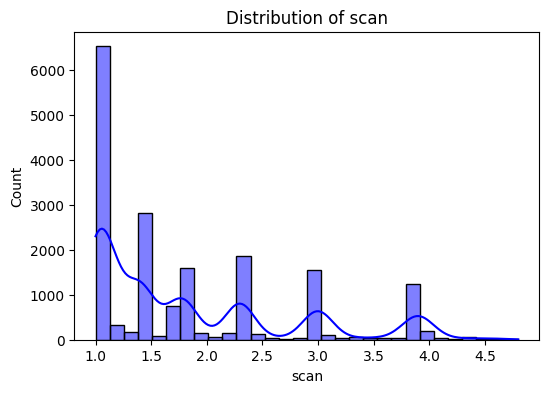

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


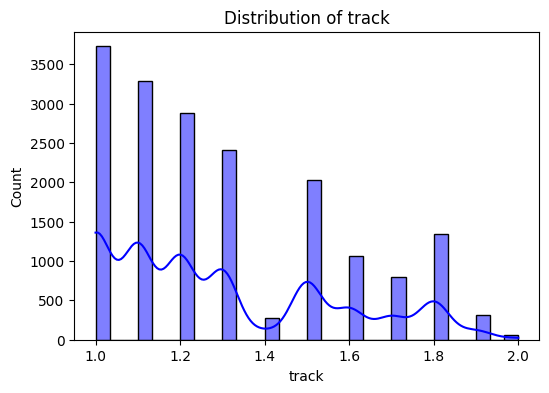

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


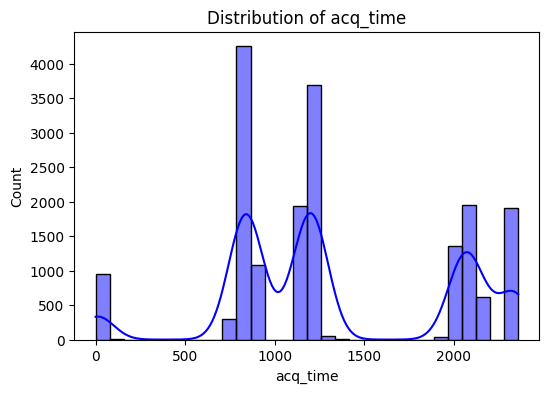

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


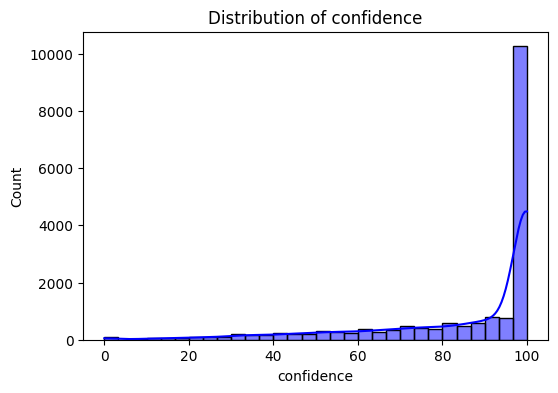

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


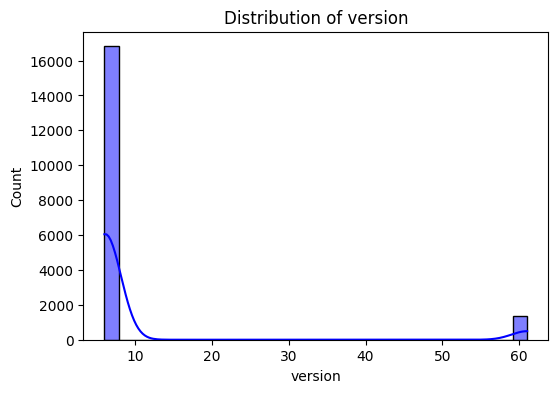

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


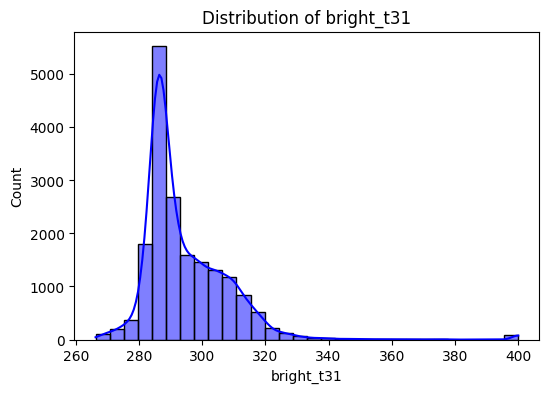

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


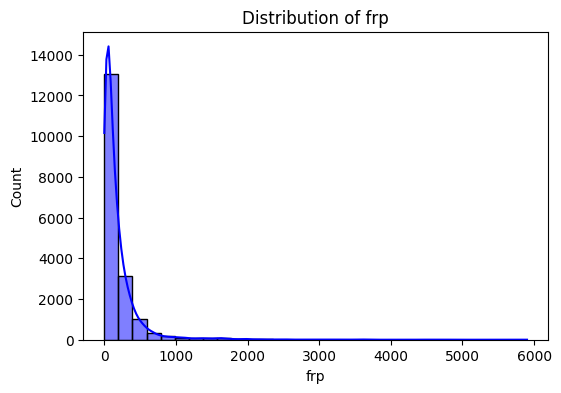

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


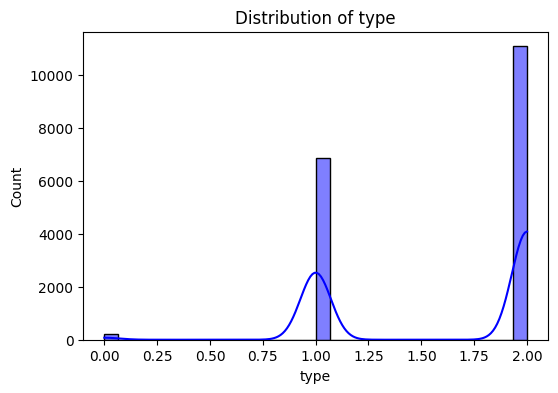

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


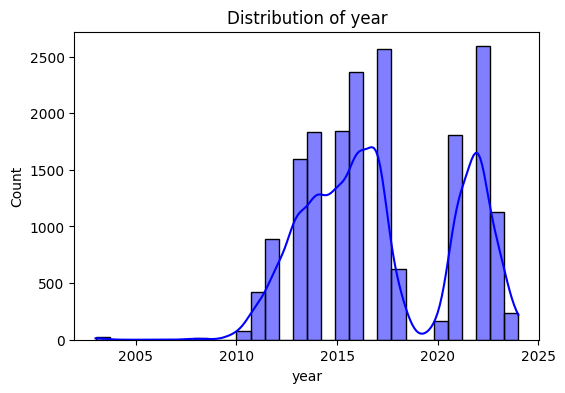

In [18]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != 'label']

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")
    plt.show()



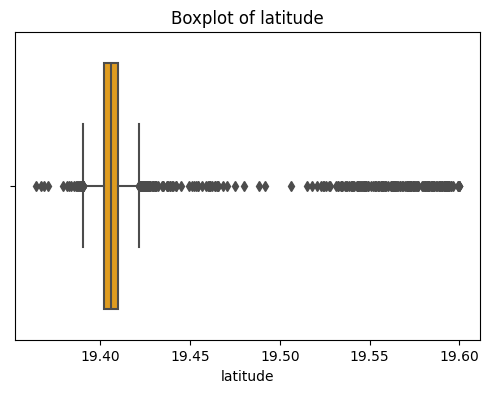

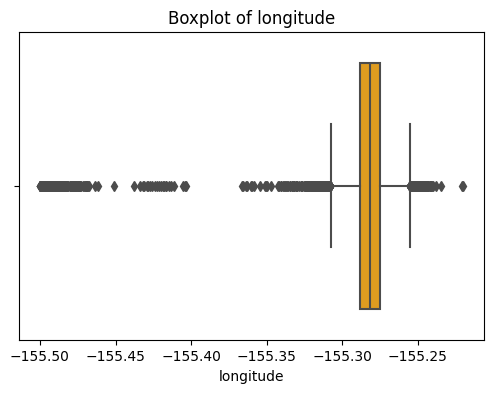

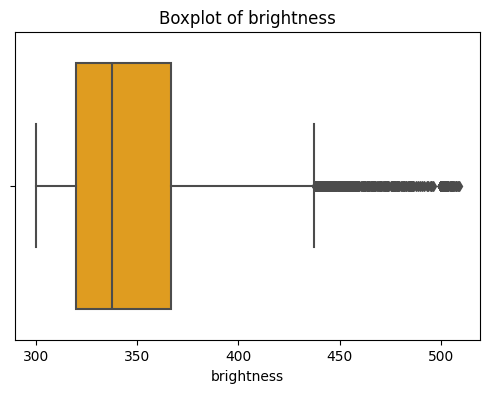

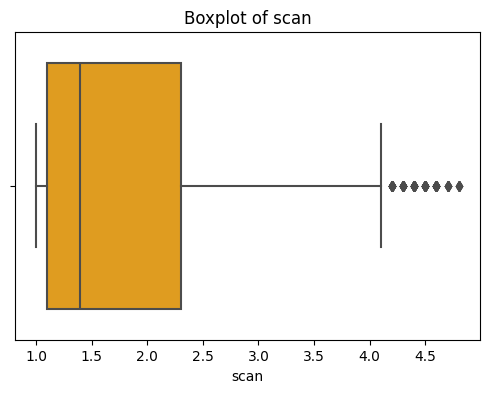

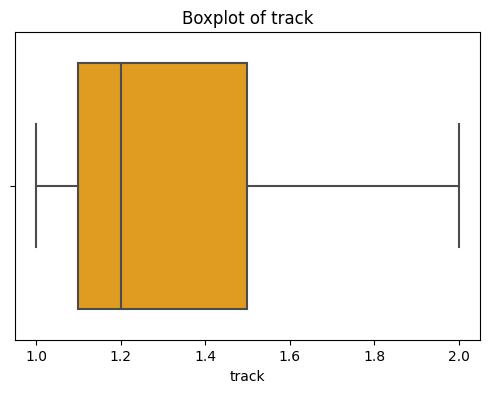

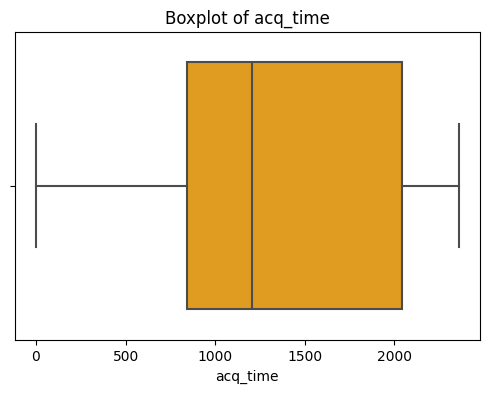

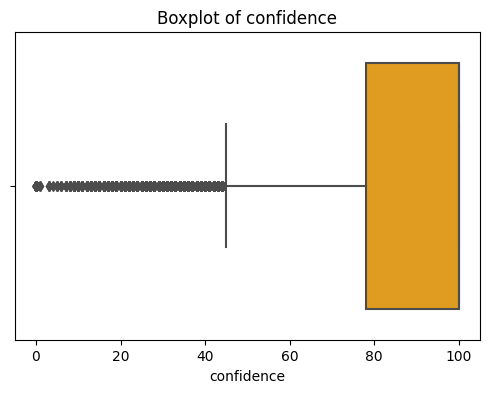

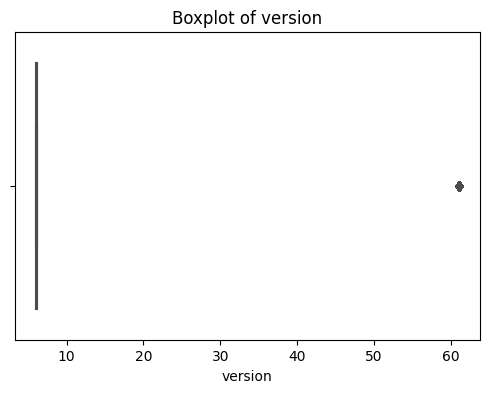

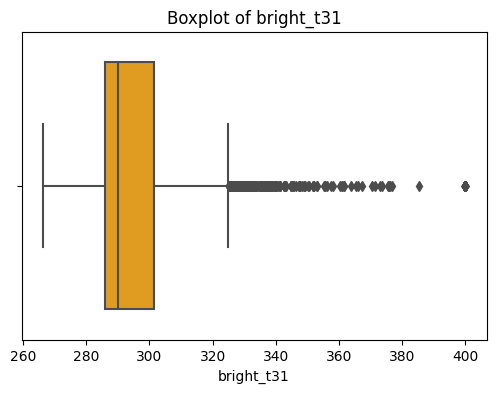

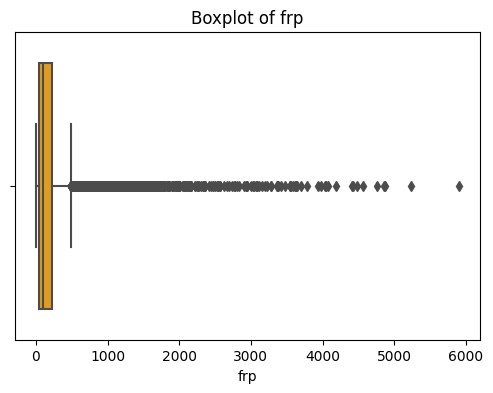

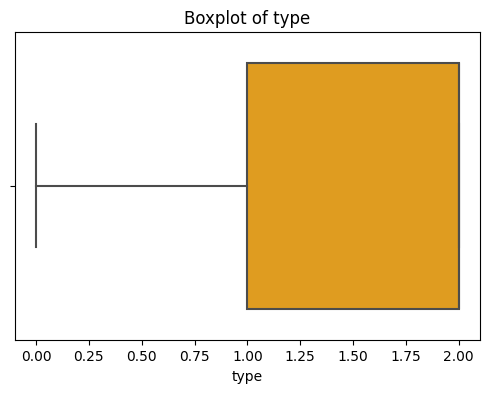

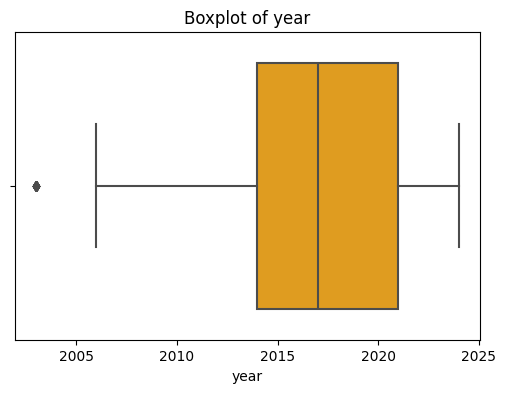

In [19]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], color='orange')
    plt.title(f"Boxplot of {col}")
    plt.show()

### Bivariate Analysis (Label vs Numeric Features)

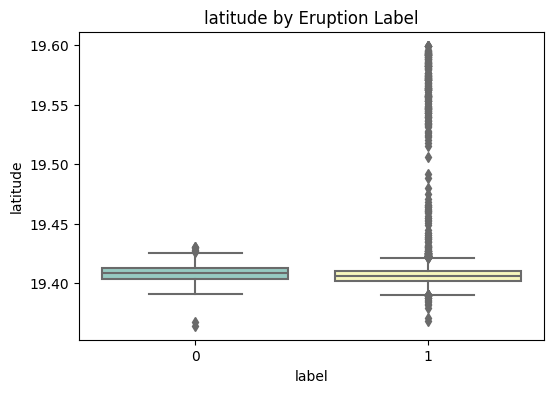

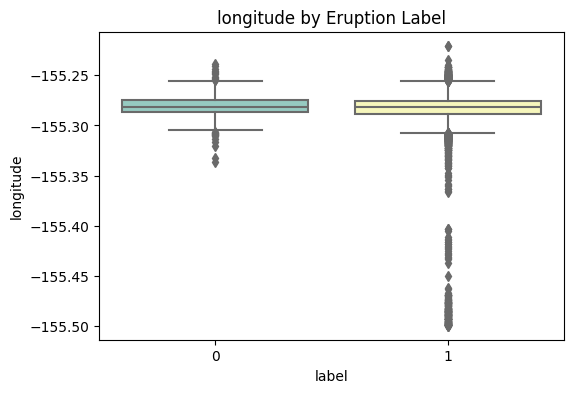

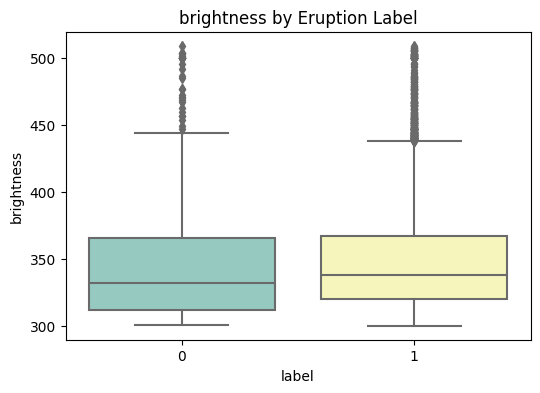

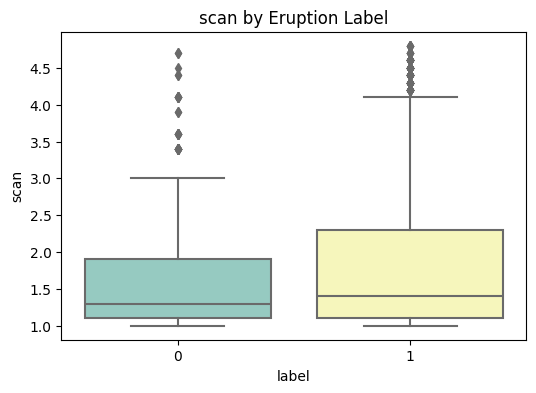

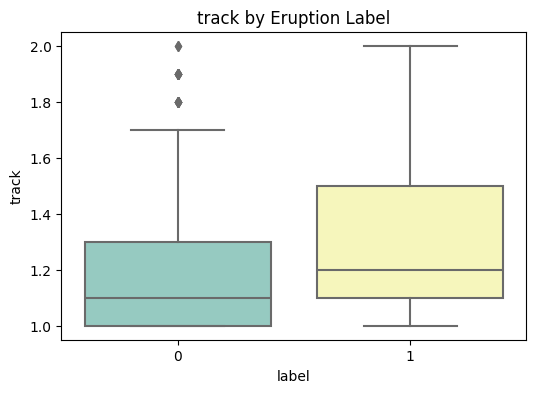

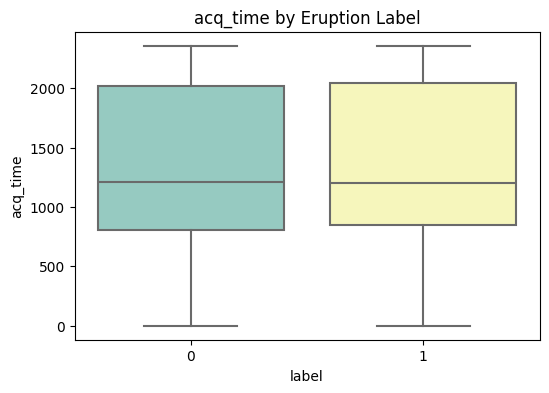

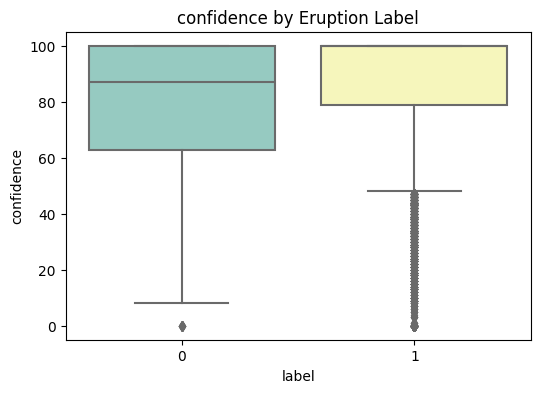

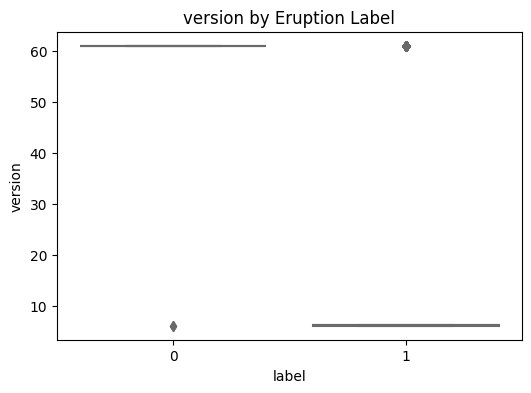

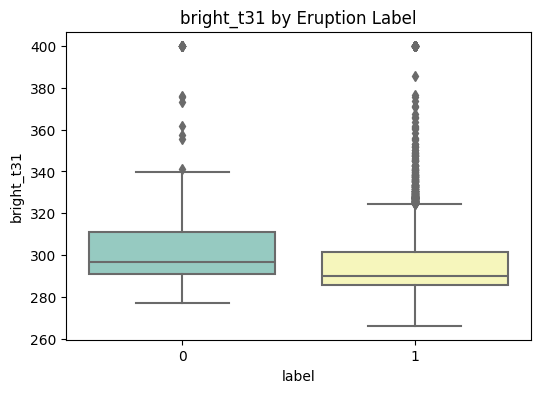

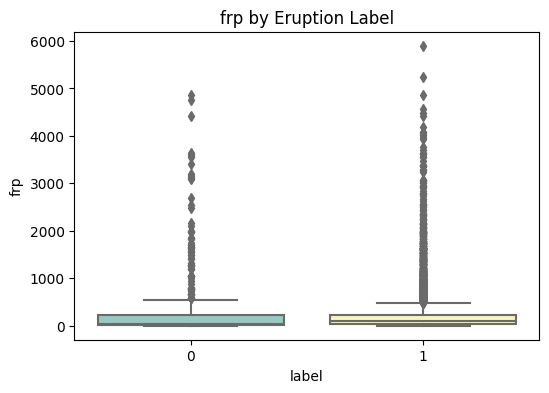

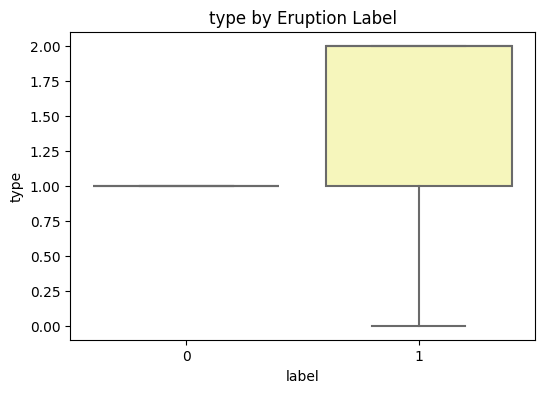

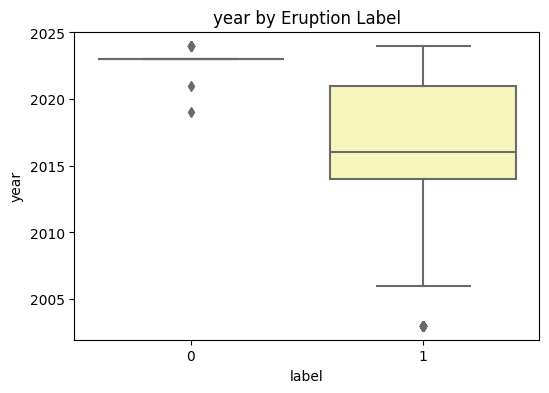

In [20]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='label', y=col, data=df, palette='Set3')
    plt.title(f"{col} by Eruption Label")
    plt.show()

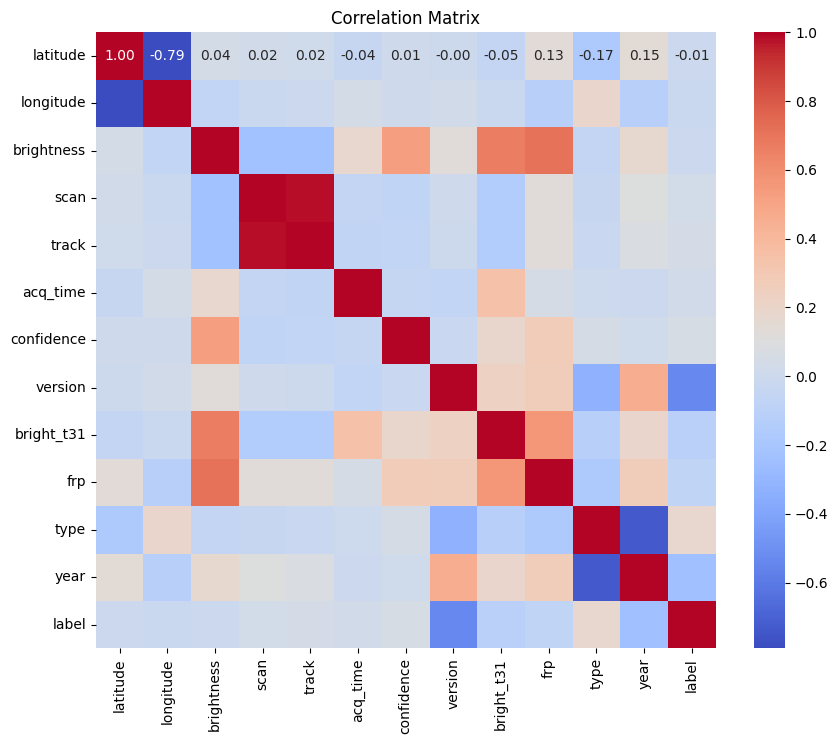

In [21]:
plt.figure(figsize=(10,8))
corr_matrix = df[numeric_cols + ['label']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

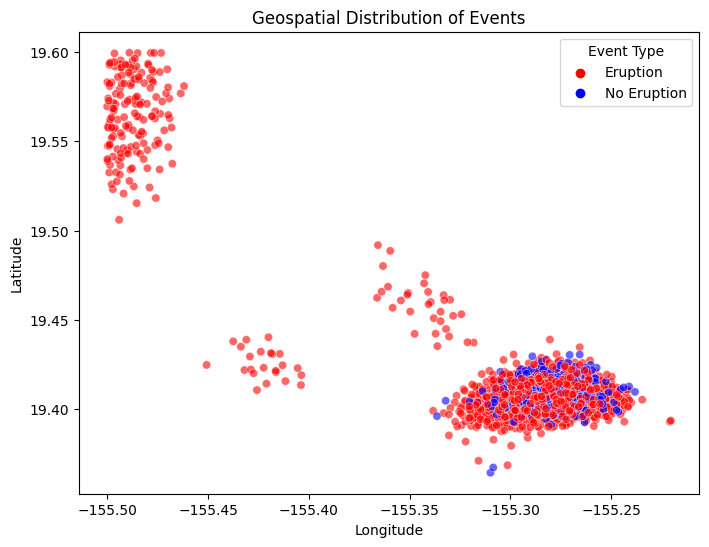

In [22]:
label_map = {0: 'No Eruption', 1: 'Eruption'}
df['label_desc'] = df['label'].map(label_map)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='longitude',
    y='latitude',
    hue='label_desc',
    data=df,
    palette={'No Eruption': 'blue', 'Eruption': 'red'},
    alpha=0.6
)
plt.title("Geospatial Distribution of Events")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Event Type")
plt.show()


### Time-Based Patterns

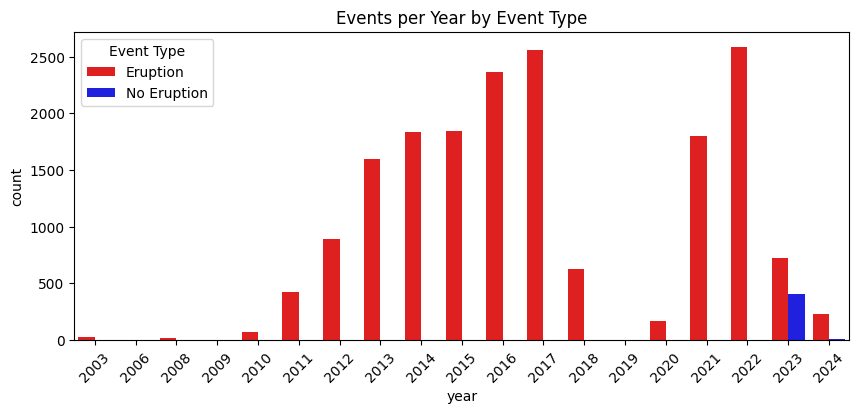

In [23]:
if 'eruption_date' in df.columns:
    df['eruption_date'] = pd.to_datetime(df['eruption_date'], errors='coerce')

    label_map = {0: 'No Eruption', 1: 'Eruption'}
    df['label_desc'] = df['label'].map(label_map)

    df['month'] = df['eruption_date'].dt.month
    df['Month'] = df['month'].apply(lambda x: calendar.month_abbr[x] if pd.notnull(x) else None)
    df['year'] = df['eruption_date'].dt.year

    plt.figure(figsize=(10,4))
    sns.countplot(x='year', hue='label_desc', data=df,
                  palette={'No Eruption': 'blue', 'Eruption': 'red'})
    plt.title("Events per Year by Event Type")
    plt.xticks(rotation=45)
    plt.legend(title="Event Type")
    plt.show()

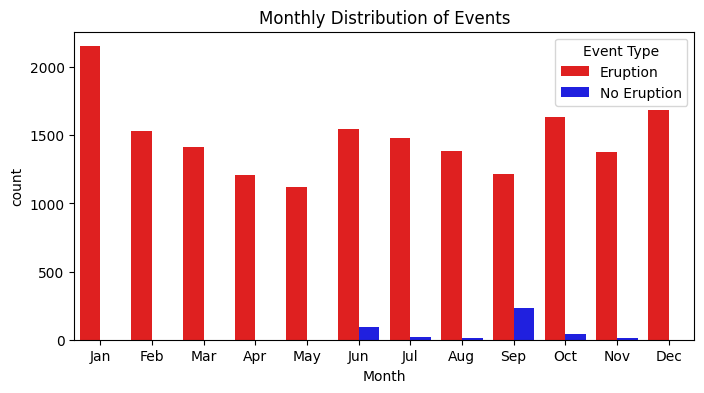

In [24]:
plt.figure(figsize=(8,4))
sns.countplot(x='Month', hue='label_desc', data=df,
              palette={'No Eruption': 'blue', 'Eruption': 'red'},
              order=list(calendar.month_abbr)[1:])
plt.title("Monthly Distribution of Events")
plt.legend(title="Event Type")
plt.show()

### Scatter Matrix for Multi-feature Patterns

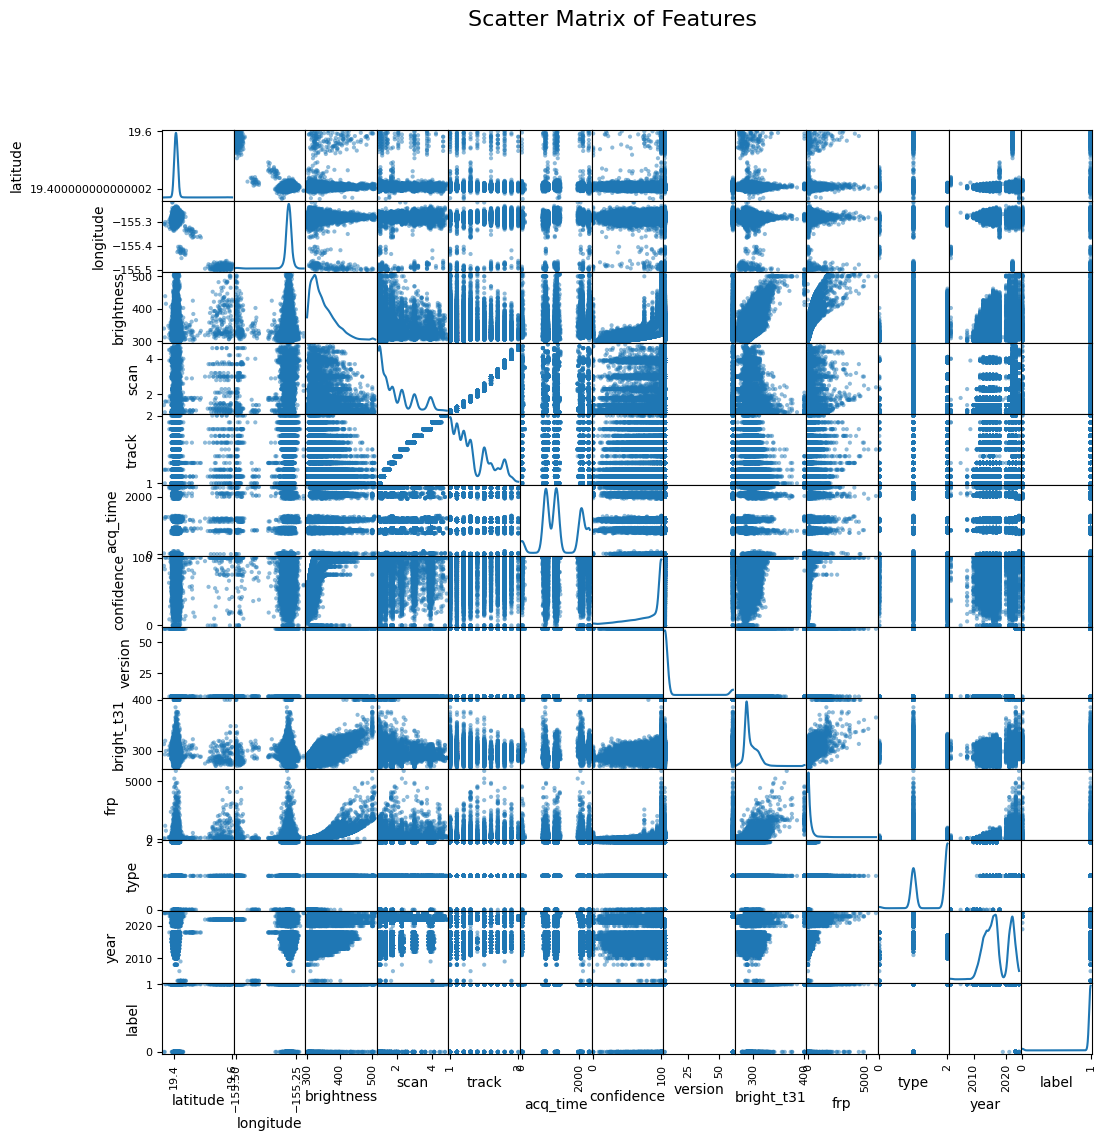

In [25]:
scatter_matrix(
    df[numeric_cols + ['label']],
    figsize=(12, 12),
    diagonal='kde',
    alpha=0.5
)
plt.suptitle("Scatter Matrix of Features", size=16)
plt.show()


### Pattern Observations

In [26]:
def extract_feature_patterns(df, target_col="label"):
    observations = []

    numeric_df = df.select_dtypes(include=[np.number])
    if target_col in numeric_df.columns:
        corr = numeric_df.corr()[target_col].sort_values(ascending=False)
        top_corr = corr.drop(target_col).head(3)
        observations.append(f"Strong correlations detected with target: {dict(top_corr.round(3))}")

    if {"frp", "brightness", "bright_t31"}.issubset(df.columns):
        corr_frp = df[["frp","brightness","bright_t31"]].corr().round(3)
        observations.append(f"FRP, Brightness, and Bright_T31 show strong mutual correlations:\n{corr_frp.to_dict()}")

    # Spatial clustering
    if {"latitude", "longitude"}.issubset(df.columns):
        erupt_locs = df[df[target_col]==1][["latitude","longitude"]]
        spread_lat = erupt_locs["latitude"].std()
        spread_lon = erupt_locs["longitude"].std()
        observations.append(
            f"Eruption events cluster spatially near mean(lat={erupt_locs['latitude'].mean():.2f}, "
            f"lon={erupt_locs['longitude'].mean():.2f}) with std dev (lat={spread_lat:.2f}, lon={spread_lon:.2f})."
        )

    if "year" in df.columns:
        erupt_years = df[df[target_col]==1]["year"].value_counts().sort_index()
        if not erupt_years.empty:
            peak_year = erupt_years.idxmax()
            observations.append(f"Eruption frequency peaks in year {peak_year} with {erupt_years.max()} events.")

    if "month" in df.columns:
        erupt_months = df[df[target_col]==1]["month"].value_counts().sort_index()
        if not erupt_months.empty:
            peak_month = erupt_months.idxmax()
            observations.append(f"Eruption activity shows seasonal influence, peaking in month {peak_month}.")

    if "confidence" in df.columns:
        mean_conf = df["confidence"].mean()
        observations.append(f"Average confidence of detections is {mean_conf:.2f}, "
                            f"indicating generally {'high' if mean_conf>50 else 'low'} reliability.")

    print("PATTERN Observations:")
    for obs in observations:
        print(f"- {obs}")

extract_feature_patterns(df, target_col="label")

PATTERN Observations:
- Strong correlations detected with target: {'type': 0.178, 'confidence': 0.057, 'track': 0.043}
- FRP, Brightness, and Bright_T31 show strong mutual correlations:
{'frp': {'frp': 1.0, 'brightness': 0.713, 'bright_t31': 0.562}, 'brightness': {'frp': 0.713, 'brightness': 1.0, 'bright_t31': 0.67}, 'bright_t31': {'frp': 0.562, 'brightness': 0.67, 'bright_t31': 1.0}}
- Eruption events cluster spatially near mean(lat=19.41, lon=-155.28) with std dev (lat=0.02, lon=0.02).
- Eruption frequency peaks in year 2022 with 2590 events.
- Eruption activity shows seasonal influence, peaking in month 1.
- Average confidence of detections is 86.05, indicating generally high reliability.


### Feature Engineering & Preprocessing

In [27]:
X = df[["latitude", "longitude", "frp", "brightness", "bright_t31", "confidence"]]
y = df["label"]

In [28]:
from sklearn.model_selection import train_test_split

if "date" in X.columns:
    X["year"] = X["date"].dt.year
    X["month"] = X["date"].dt.month
    X["day"] = X["date"].dt.day
    X["dayofweek"] = X["date"].dt.dayofweek
    X = X.drop(columns=["date"])

X = pd.get_dummies(X, drop_first=True)

X = X.select_dtypes(include=["number"])

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.30, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

print("Train:", X_train.shape, "Validation:", X_val.shape, "Test:", X_test.shape)

Train: (12718, 6) Validation: (2725, 6) Test: (2726, 6)



[Before SMOTE] Class Distribution:
label
Eruption       12430
No Eruption      288
Name: count, dtype: int64


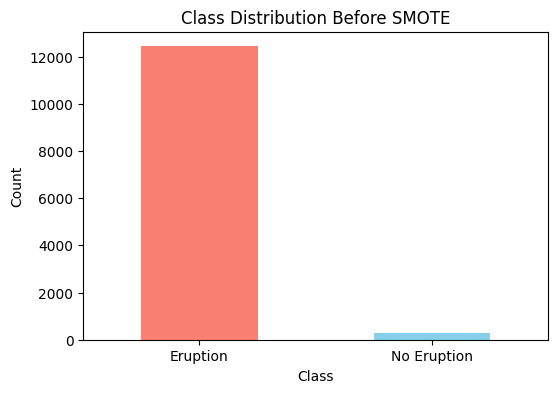


[After SMOTE] Class Distribution:
label
Eruption       12430
No Eruption    12430
Name: count, dtype: int64


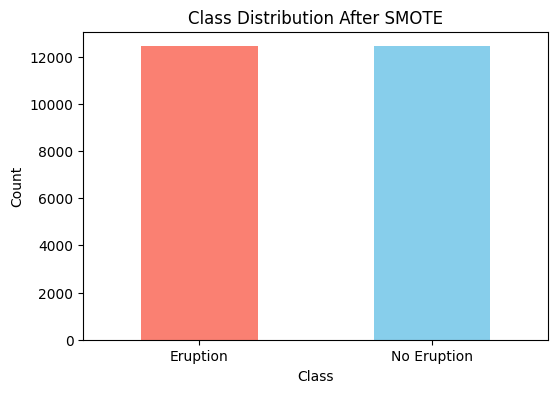

In [31]:
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

label_map = {0: "No Eruption", 1: "Eruption"}
y_train_named = y_train.map(label_map)

print("\n[Before SMOTE] Class Distribution:")
print(y_train_named.value_counts())

# Plot before SMOTE
plt.figure(figsize=(6,4))
y_train_named.value_counts().plot(
    kind="bar", 
    color=["salmon", "skyblue"]
)
plt.title("Class Distribution Before SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

y_train_res_named = pd.Series(y_train_res).map(label_map)

print("\n[After SMOTE] Class Distribution:")
print(y_train_res_named.value_counts())

# Plot after SMOTE
plt.figure(figsize=(6,4))
y_train_res_named.value_counts().plot(
    kind="bar", 
    color=["salmon", "skyblue"] 
)
plt.title("Class Distribution After SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=0) 
plt.show()

In [32]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [33]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf_params = {"n_estimators":[100,200],
             "max_depth":[None,10,20]}
rf_grid = GridSearchCV(rf, rf_params, cv=3, scoring="accuracy", n_jobs=-1)
rf_grid.fit(X_train_res, y_train_res)
best_rf = rf_grid.best_estimator_
print("Best RF:", rf_grid.best_params_)

# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb_params = {"n_estimators":[100,200],
             "learning_rate":[0.05,0.1],
             "max_depth":[2,3]}
gb_grid = GridSearchCV(gb, gb_params, cv=3, scoring="accuracy", n_jobs=-1)
gb_grid.fit(X_train_res, y_train_res)
best_gb = gb_grid.best_estimator_
print("Best GB:", gb_grid.best_params_)

# Logistic Regression (Baseline)
lr = LogisticRegression(max_iter=1000, random_state=42, solver="liblinear")
lr_params = {"C":[0.01,0.1,1,10],
             "penalty":["l1","l2"]}
lr_grid = GridSearchCV(lr, lr_params, cv=3, scoring="accuracy", n_jobs=-1)
lr_grid.fit(X_train_res, y_train_res)
best_lr = lr_grid.best_estimator_
print("Best LR:", lr_grid.best_params_)

Best RF: {'max_depth': None, 'n_estimators': 200}
Best GB: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best LR: {'C': 10, 'penalty': 'l1'}


In [34]:
# Ensemble Model (Voting Classifier)

ensemble = VotingClassifier(
    estimators=[("rf", best_rf), ("gb", best_gb), ("lr", lr)],
    voting="soft"
)
ensemble.fit(X_train_res, y_train_res)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=200,
                                                     random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(n_estimators=200,
                                                         random_state=42)),
                             ('lr',
                              LogisticRegression(max_iter=1000, random_state=42,
                                                 solver='liblinear'))],
                 voting='soft')

### Evaluation of Ensemble Model

In [35]:
from sklearn.metrics import classification_report, accuracy_score

models = {
    "Random Forest": best_rf,
    "Gradient Boosting": best_gb,
    "Logistic Regression": best_lr,
    "Ensemble": ensemble
}

for name, model in models.items():
    preds = model.predict(X_val)
    acc = accuracy_score(y_val, preds)

# Classification Report
final_preds = ensemble.predict(X_test)
print("\nEnsemble Model Test Report:")
print(classification_report(
    y_test,
    final_preds,
    target_names=["No Eruption", "Eruption"]
))


Ensemble Model Test Report:
              precision    recall  f1-score   support

 No Eruption       0.18      0.58      0.27        62
    Eruption       0.99      0.94      0.96      2664

    accuracy                           0.93      2726
   macro avg       0.58      0.76      0.62      2726
weighted avg       0.97      0.93      0.95      2726



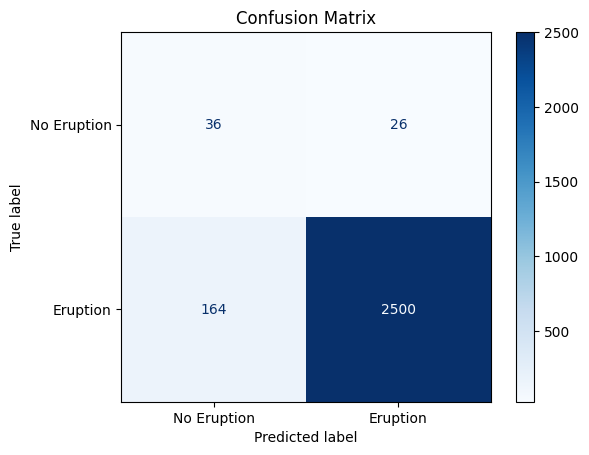

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

final_preds = ensemble.predict(X_test)

cm = confusion_matrix(y_test, final_preds)

labels = ["No Eruption", "Eruption"]

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues, values_format="d")
plt.title("Confusion Matrix")
plt.show()

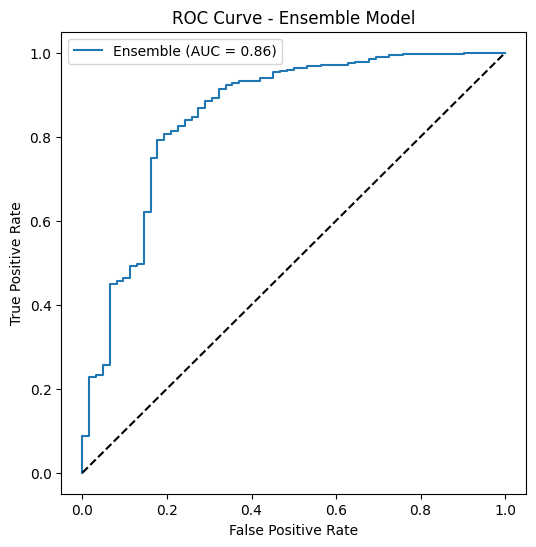

In [41]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

y_pred = ensemble.predict(X_test)
y_proba = ensemble.predict_proba(X_test)[:, 1] 

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"Ensemble (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Ensemble Model")
plt.legend()
plt.show()

### Model Explannability with SHAP


[SHAP] Running explainability for Ensemble Model


  0%|          | 0/200 [00:00<?, ?it/s]

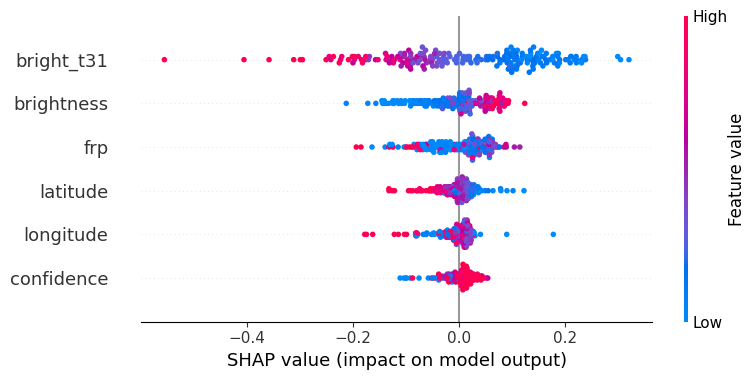

In [42]:
import shap
import matplotlib.pyplot as plt

print("\n[SHAP] Running explainability for Ensemble Model")

def ensemble_predict(X):
    return ensemble.predict_proba(X)[:, 1]

background = shap.sample(X_train, 100, random_state=42)
X_sample = shap.sample(X_test, 200, random_state=42)

explainer = shap.KernelExplainer(ensemble_predict, background)
shap_values = explainer.shap_values(X_sample)

feature_names = X.columns

# Summary Plot (Global Feature Importance)
shap.summary_plot(shap_values, X_sample, feature_names=feature_names)

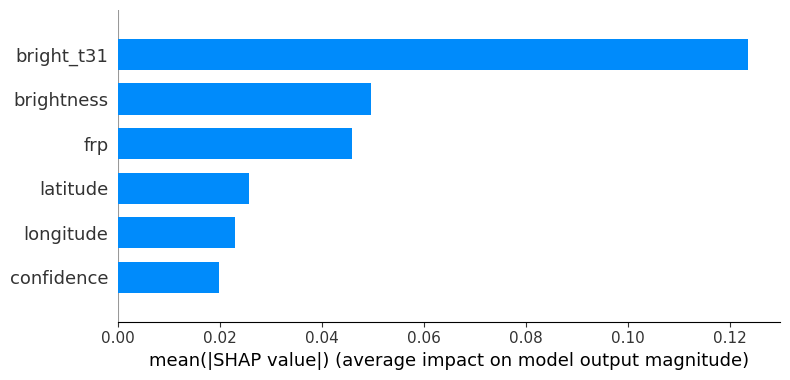

In [43]:
# Bar Plot
shap.summary_plot(shap_values, X_sample, feature_names=feature_names, plot_type="bar")